<a href="https://colab.research.google.com/github/Muideen-Abubakar/Retirement-Fund-Investment-Strategy/blob/main/Retirement_Fund_Investment_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Corporate Pension Fund Management

In [1]:
#NB: You'll need to run the full code first (section 5), before running the code snippets under sections 2-3

## Table of Contents

### 1. Introduction

### 2. Proposed strategy and how it was created

### 3. Why this strategy

### 4. Shortfall and Mitigation / Contingency plan

### 5. The full code

### 1. Introduction

The objective is to develop a strategy for a large-cap client for the management of its corporate pension fund. While the client expects at least a monthly payout of $1.002mn over the next ten years, the most desirable scenario is to maximize the monthly returns in order to pay higher than the hurdle payout. 

Given two asset classes (a fixed-income and equity index) as the investible universe, and historical data spanning 18 years and 5 months (221 months), three different portfolio construction strategies (a 40/60 fixed-income and equity weight split, Minimum Variance and Equal Risk Contribution) were tested on a 120-month horizon to assess the effectiveness of such strategy vis-à-vis the return and risk outcomes. 

While the strategies were tested against the first 120 months (31-Oct-2003 till 30-Sep-2013) of the datasets, they were also evaluated against the last 120 months of datasets (29-Feb-2012 till 31-Jan-2022). But the latter is more preferred for the backtest due to its recency and would better reflect more recent market developments. 




### 2. Proposed strategy and how it was created

The Equal Risk Contribution (ERC) strategy is the most preferred and would be recommended to the client as it gives a fine balance between risk and return expectations. Of the three assessed strategies, ERC takes a mid-ground between both extremes of the 40/60 and Minimum Variance (MV). The former results in an exponentially high return but likewise high volatility, while the MV strategy resulted in a relatively lower return given its conservative portfolio mix. 

More importantly, constantly bearing in mind the nature of the portfolio (a pension fund) necessitates that it shouldn’t be exposed to a highly risky investment that may leave the client worse off in the event of a market shock or one that is overly conservative in terms of risk, which will depress returns.

The idea was to budget the risk contribution of each of the assets, such that they contribute equally to the overall portfolio risk. As such, the goal was to evaluate the appropriate weights that makes this achievable. The resulting weight was an 81/19 split between fixed income and equities, leading to an equal risk contribution of 0.005. How this strategy was created is detailed below


In [ ]:
#Obtain the covariance of returns
returns_T = returns_1.T
returns_list = []

for i in range(len(returns_T.iloc[:,0])):
    returns_list.append(list(returns_T.iloc[i]))
    
returns_list = np.vstack(returns_list)
cov_returns = np.cov(returns_list)


In [ ]:
#Set the independent variables
import sympy as sy
w_FI = sy.symbols('w_FI')
w_eqty = sy.symbols('w_eqty')

#Calculate portfolio standard deviation
port3_std = ((w_FI**2)*(FI_std**2) + (w_eqty**2)*(eqty_std**2) + 2*w_FI*w_eqty*FI_std*eqty_std*rho)**0.5


#Calculate the risk contribution of each assets; rc_FI and rc_eqty
rc_FI = ((w_FI*cov_returns[0][0]+w_eqty*cov_returns[0][1])*w_FI)/port3_std
rc_eqty = ((w_FI*cov_returns[1][0]+w_eqty*cov_returns[1][1])*w_eqty)/port3_std

In [ ]:
#Obtain the weight that gives equal risk contribution

fun1 = rc_FI - rc_eqty
fun2 = (w_FI+w_eqty)-1

result = sy.solve([fun1,fun2],[w_FI,w_eqty])


In [ ]:
#Confirm that the weights are correct - rc_FI will equal rc_eqty

result_w_FI = result[0][0]
result_w_eqty = result[0][1]

port3_std = ((result_w_FI**2)*(FI_std**2) + (result_w_eqty**2)*(eqty_std**2) + 2*result_w_FI*result_w_eqty*FI_std*eqty_std*rho)**0.5
result_rc_FI = ((result_w_FI*cov_returns[0][0]+result_w_eqty*cov_returns[0][1])*result_w_FI)/port3_std
result_rc_eqty = ((result_w_FI*cov_returns[1][0]+result_w_eqty*cov_returns[1][1])*result_w_eqty)/port3_std

print("The risk contribution of FI: ", result_rc_FI, '\n')
print("The risk contribution of equity: ", result_rc_eqty)

The risk contribution of FI:  0.00524460416901391 

The risk contribution of equity:  0.00524460416901390


In [ ]:
print('The weight of fixed income: ','{0:.2f}%'.format(result_w_FI*100),'\n', 'The weight of equities: ','{0:.2f}%'.format(result_w_eqty*100))

The weight of fixed income:  80.69% 
 The weight of equities:  19.31%


### 3. Why this strategy 

Each of the three strategies were assessed against different performance and risk analysis namely – Total payout and simulated mean monthly payout, Maximum Drawdown, Standard Deviation, Value at Risk (VaR) and Conditional Value at Risk (Expected shortfall). 

In what follows, I will give a comparison of the outcomes of each analysis for each of the strategies, and give 3 justifications for the recommended strategy and contingency plan regarding expected shortfall 


   #### 3a. Decent Total Payout and simulated mean monthly payout

Unarguably, maximising the final payout is in the interest of the client. A table showing the final payout based on the backtested data for each strategy is illustrated below. The 40/60 strategy delivered the highest total payout of £182.44mn versus the Minimum Variance (MV) strategy which delivered a payout of £139.83mn while the Equal Risk Contribution (ERC) strategy took the mid position of £149.84mn. These results are expectedly so, given their respective volatilities (as would be illustrated later). However, worthy of note is that all three strategies beat the cumulative hurdle payout of £120.24mn (given the minimum monthly payout of £1.002mn for 120 months)

Expectedly, the estimated average monthly payout based on 1,000 simulations also resulted in each of the strategies maintaining their respective positions, with the 40/60 strategy resulting in the highest average payout of £1.52mn


In [ ]:
print('Cummulative Payout based on backtest data', '\n')
print(tabulate([['40/60 Strategy', (cum_payout_40_60)/1000],['Equal Risk Contribution', (cum_payout_erc)/1000],['Min variance', (cum_payout_min_var)/1000]], headers = ['Strategy', "Total Payout '000" ]))

Cummulative Payout based on backtest data 

Strategy                   Total Payout '000
-----------------------  -------------------
40/60 Strategy                        182443
Equal Risk Contribution               149836
Min variance                          139833


In [ ]:
print('Avg Monthly Payout based on simulated data', '\n')
print(tabulate([['40/60 Strategy', 1039608.37/1000],['Equal Risk Contribution', 1021304.83/1000],['Min variance', 1015315.30/1000]], headers = ['Strategy', "Simulated Monthly Payout '000" ]))

Avg Monthly Payout based on simulated data 

Strategy                   Simulated Monthly Payout '000
-----------------------  -------------------------------
40/60 Strategy                                   1039.61
Equal Risk Contribution                          1021.3
Min variance                                     1015.32


#### 3b. Minimal portfolio volatility

As a standalone, the return on each asset, Fixed Income and Equity had a volatility of 0.009 and 0.038 respectively. However, the MV strategy showed the lowest volatility of 0.09 given that 95% of portfolio was invested in Fixed Income and the extreme end is the 40/60 strategy with a risk of 0.023. Budgeting an equal risk contribution for both assets in the portfolio amounted to a weight of 81% in Fixed Income and 19% in equities, helping to moderate the portfolio volatility to 0.01



In [ ]:
print('Portfolio standard deviation for each strategy', '\n')
print(tabulate([['40/60 Strategy', exp_vol],['Equal Risk Contribution', port3_std],['Min variance', port2_std]], headers = ['Strategy', "Standard Deviation"]))

Portfolio standard deviation for each strategy 

Strategy                   Standard Deviation
-----------------------  --------------------
40/60 Strategy                     0.023082
Equal Risk Contribution            0.0104018
Min variance                       0.00884432


#### 3c. Lowest drawdown and shortest recovery time

Given the higher volatility of equity returns and a higher exposure to it under the 40/60 strategy, it resulted in a max drawdown of -12.49% experienced from March 2020. The landslide drawdown can be closely linked to the Covid-induced market downturn experienced between February and March 2020* . On the contrary, drawdown on both the MV and ERC strategy were subdued at -3.79% and -3.42% respectively as a result of their conservative exposure to equities. Notwithstanding, it took 11 months for the MV strategy to recover from its drawdown, almost 5 months for the 40/60 strategy and the ERC recovered in the shortest period within almost 2 months. 

*https://www.forbes.com/sites/lizfrazierpeck/2021/02/11/the-coronavirus-crash-of-2020-and-the-investing-lesson-it-taught-us/?sh=68ece95446cf

In [ ]:
print(tabulate([['40/60 Strategy', '{0:.2f}%'.format(MDD_40_60*100), '{0:.2f} months'.format(recovery_time_1)], ['Eq. Risk Cont.', '{0:.2f}%'.format(MDD_erc*100),'{0:.2f} months'.format(recovery_time_3)] ,['Min variance', '{0:.2f}%'.format(MDD_min_var*100), '{0:.2f} months'.format(recovery_time_2)]], headers = ['Strategy', 'Max Drawdown', 'Recovery Time']))

Strategy        Max Drawdown    Recovery Time
--------------  --------------  ---------------
40/60 Strategy  -12.49%         4.97 months
Eq. Risk Cont.  -3.42%          1.97 months
Min variance    -3.79%          11.02 months


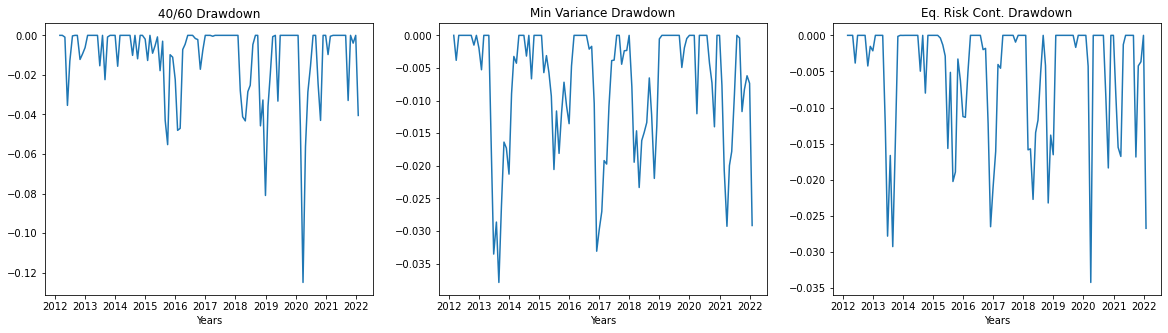

In [ ]:
x1 = drawdown(payout_schedule.Port_return)['Drawdown'].index
y1 = drawdown(payout_schedule.Port_return)['Drawdown']

x2 = drawdown(payout_schedule2.Port_return)['Drawdown'].index
y2 = drawdown(payout_schedule2.Port_return)['Drawdown']

x3 = drawdown(payout_schedule3.Port_return)['Drawdown'].index
y3 = drawdown(payout_schedule3.Port_return)['Drawdown']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))

#40/60 drawdown plot
ax1.plot(x1, y1)
ax1.set_title("40/60 Drawdown")
ax1.set_xlabel('Years')

#Min variance drawdown plot
ax2.plot(x2, y2)
ax2.set_title("Min Variance Drawdown")
ax2.set_xlabel('Years')

# ERC drawdown plot
ax3.plot(x3, y3)
ax3.set_title("Eq. Risk Cont. Drawdown")
ax3.set_xlabel('Years')

plt.show()

### 4. Shortfall and Mitigation / Contingency Plan

#### 4a. Shortfall
A payout schedule has been constructed for each strategy (see below for the payout schedule based on the ERC strategy). The schedule shows the inflow and outflow from the fund vis-à-vis returns made on the fund and monthly payout based on the backtested 120 months data

From the below, we could see that the fund is able to meets its monthly obligation up till the final month, where there is a shortfall of £43,266 that may have to be funded by the client. Noteworthy is that the remaining funds of £1,576,021 would actually conveniently cover the minimum payout of £1,002mn. However, the shortfall was induced by the fact the payout has to be the max of (£1,002mn and P). Regardless, the occurrence of a shortfall doesn’t necessary weaken the merit of this strategy as the other evaluated strategies also suffered a shortfall on the last months


In [ ]:
print('Portfolio Schedule based on the ERC Strategy', '\n')
display(payout_schedule3)

Portfolio Schedule based on the ERC Strategy 



TTM       Opening_Bal   Portfolio_Value               P  \
2012-02-29  120       120000000.0  120908595.144702       1000000.0   
2012-03-30  119  119906595.144702  120064822.331562  1007618.446594   
2012-04-30  118  119057203.884968  119750644.143641  1008959.354957   
2012-05-31  117  118741684.788683  118286133.910737  1014886.194775   
2012-06-29  116  117271247.715962  118130793.110261  1010959.032034   
...         ...               ...               ...             ...   
2021-09-30    5    8038623.659865    7903215.046514  1607724.731973   
2021-10-29    4    6295490.314541    6376305.338132  1573872.578635   
2021-11-30    3    4802432.759497    4805155.630026  1600810.919832   
2021-12-31    2    3204344.710194    3221460.271446  1602172.355097   
2022-01-31    1    1619287.916349    1576021.537904  1619287.916349   

            Fixed_Payout    Final_Payout       Closing_Bal  Port_return  
2012-02-29     1002000.0       1002000.0  119906595.144702     0.007572  
2012-03-30     1002000.0  1007618.446594  119057203.884968     0.001320  
2012-04-30     1002000.0  1008959.354957  118741684.788683     0.005824  
2012-05-31     1002000.0  1014886.194775  117271247.715962    -0.003836  
2012-06-29     1002000.0  1010959.032034  117119834.078227     0.007330  
...                  ...             ...               ...          ...  
2021-09-30     1002000.0  1607724.731973    6295490.314541    -0.016845  
2021-10-29     1002000.0  1573872.578635    4802432.759497     0.012837  
2021-11-30     1002000.0  1600810.919832    3204344.710194     0.000567  
2021-12-31     1002000.0  1602172.355097    1619287.916349     0.005341  
2022-01-31     1002000.0  1619287.916349     -43266.378445    -0.026719  

[120 rows x 8 columns]

Further analysis of the Conditional VaR (expected shortfall) was also conducted, to assess the expected shortfall of this strategy within a 95% interval for one-month horizon.  While at -0.78%, the ERC didn’t produce the lowest Expected Shortfall, it is only a few basis points away from the lowest of -0.67% of the MV strategy, and considerably better than the shortfall expected from the 40/60 strategy

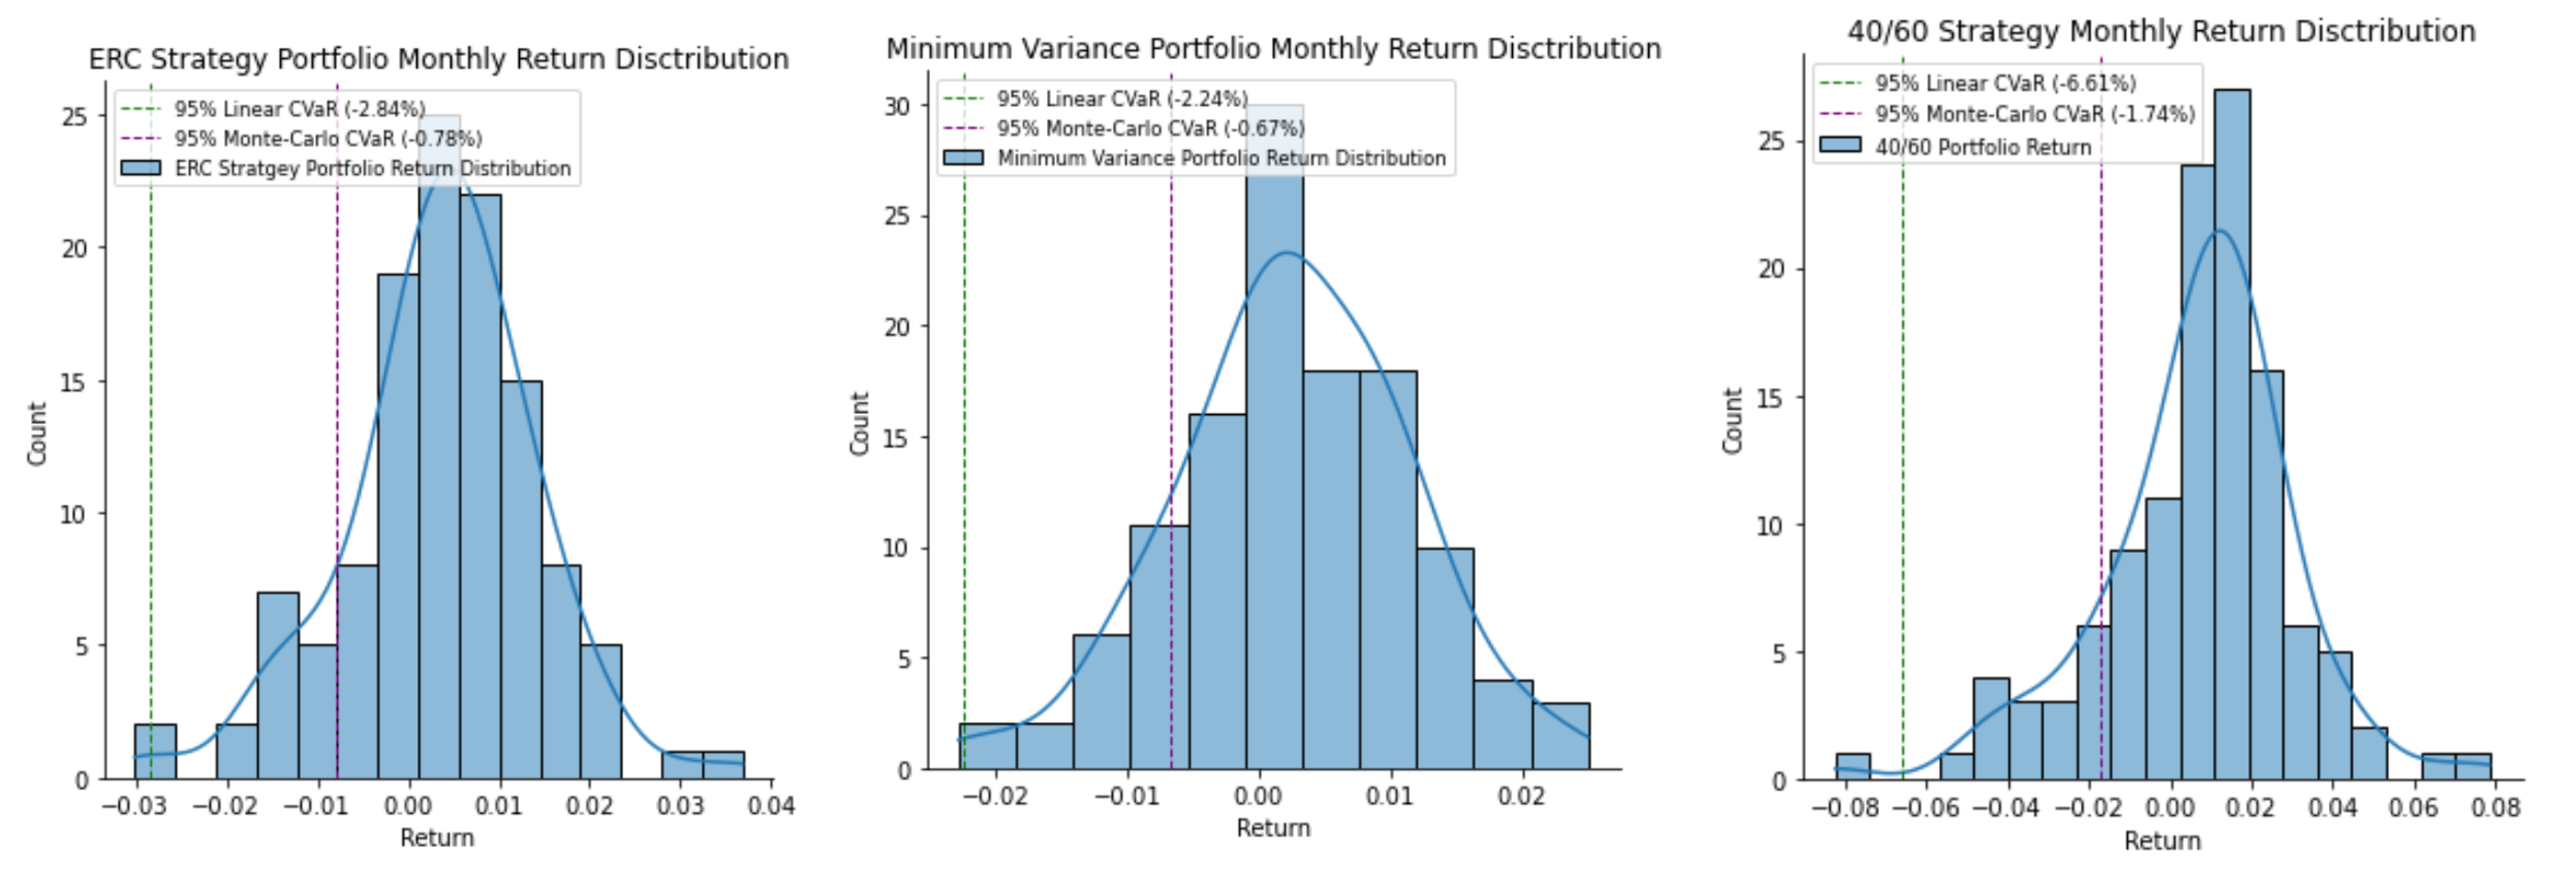

In [ ]:
Image(filename = '/Users/user/Desktop/CVar_Plots.png')

#### 4b. Mitigating the Shortfall / Contingency Plan

Having a shortfall and requiring the client to fund it may not be the most desired. As such, an intuitive approach to augment whatever shortfall that may arise is to establish a separate cash account/sinking fund. 

All the strategies evaluated were predicated on the assumptions of been fully invested and having a zero cash balance. However, it may augur well if, for every month where a positive return was realised (i.e. where portfolio value > opening balance), a certain percentage (say 0.005%) is taken off and accumulated in a sinking fund from where the shortfall may be funded. Noteworthy is also that such amount as little at 0.005% would not put the portfolio at a risk of a cash drag. Below is a demonstration of what the ERC strategy portfolio may have looked like if this contingency plan is implemented. In this instance, the portfolio would have accumulated £291,362.53 in the sinking fund and would conveniently fund the £43,078 shortfall without recourse to the client. 


In [ ]:
pd.read_csv('/Users/user/Documents/MSc BDF /Risk Analysis and Asset Allocation/Courseworks/Individual Project/ERC_Port_schedule_shortfall_fund.csv')

Month  TTM Opening Balance Portfolio Value Sinking Fund Deduction  \
0    2012-02-29  120  120,000,000.00  120,908,595.14               6,045.43   
1    2012-03-30  119  119,900,549.71  120,058,768.92               6,002.94   
2    2012-04-30  118  119,045,198.34  119,738,568.67               5,986.93   
3    2012-05-31  117  118,723,724.13  118,268,242.16                      0   
4    2012-06-29  116  117,253,509.48  118,112,924.86               5,905.65   
..          ...  ...             ...             ...                    ...   
115  2021-09-30    5    8,005,601.23    7,870,748.87                      0   
116  2021-10-29    4    6,269,628.63    6,350,111.66                 317.51   
117  2021-11-30    3    4,782,387.00    4,785,098.51                 239.25   
118  2021-12-31    2    3,190,730.25    3,207,773.09                 160.39   
119  2022-01-31    1    1,612,247.58    1,569,169.31                      0   

    Sinking Fund Balance             P  Fixed Payout        Payout  \
0               6,045.43  1,000,000.00  1,002,000.00  1,002,000.00   
1              12,048.37  1,007,567.64  1,002,000.00  1,007,567.64   
2              18,035.30  1,008,857.61  1,002,000.00  1,008,857.61   
3              18,035.30  1,014,732.68  1,002,000.00  1,014,732.68   
4              23,940.94  1,010,806.12  1,002,000.00  1,010,806.12   
..                   ...           ...           ...           ...   
115           290,645.38  1,601,120.25  1,002,000.00  1,601,120.25   
116           290,962.89  1,567,407.16  1,002,000.00  1,567,407.16   
117           291,202.14  1,594,129.00  1,002,000.00  1,594,129.00   
118           291,362.53  1,595,365.13  1,002,000.00  1,595,365.13   
119           291,362.53  1,612,247.58  1,002,000.00  1,612,247.58   

    Closing Balance  
0    119,900,549.71  
1    119,045,198.34  
2    118,723,724.13  
3    117,253,509.48  
4    117,096,213.09  
..              ...  
115    6,269,628.63  
116    4,782,387.00  
117    3,190,730.25  
118    1,612,247.58  
119      -43,078.26  

[120 rows x 10 columns]

### 5. Full Codes

In [ ]:
import pandas as pd
import numpy as np
from time import time
from math import exp, sqrt
from random import gauss, seed
from matplotlib import pyplot as plt 
from scipy.stats import norm
from sympy import *
import seaborn as sns
from IPython.display import Image

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Muideen-Abubakar/Retirement-Fund-Investment-Strategy/main/data_IP.csv")

data = data.dropna()

data

Date  Fixed_Income   Equity
0    30/09/2003     57.482021   995.97
1    31/10/2003     56.944702  1050.71
2    28/11/2003     57.135136  1058.20
3    31/12/2003     57.694630  1111.92
4    30/01/2004     57.948776  1131.13
..          ...           ...      ...
216  30/09/2021    114.026978  4307.54
217  29/10/2021    114.017029  4605.38
218  30/11/2021    114.325836  4567.00
219  31/12/2021    113.915718  4766.18
220  31/01/2022    111.639008  4515.55

[221 rows x 3 columns]

# Pre-processing of data

In [ ]:
#Convert Date column to DateTime
data['Date'] = pd.to_datetime(data['Date'])

#Set the Date column as the index
data = data.set_index('Date')

data.index.name = None

data

Fixed_Income   Equity
2003-09-30     57.482021   995.97
2003-10-31     56.944702  1050.71
2003-11-28     57.135136  1058.20
2003-12-31     57.694630  1111.92
2004-01-30     57.948776  1131.13
...                  ...      ...
2021-09-30    114.026978  4307.54
2021-10-29    114.017029  4605.38
2021-11-30    114.325836  4567.00
2021-12-31    113.915718  4766.18
2022-01-31    111.639008  4515.55

[221 rows x 2 columns]

In [ ]:
#Compute the log returns of both assets

log_ret_FI = np.log(data.Fixed_Income) - np.log(data.Fixed_Income.shift(1))

log_ret_eqty = np.log(data.Equity) - np.log(data.Equity.shift(1))

returns = pd.concat([log_ret_FI, log_ret_eqty], axis = 1)

returns = returns.dropna()

returns

Fixed_Income    Equity
2003-10-31     -0.009392  0.053504
2003-11-28      0.003339  0.007103
2003-12-31      0.009745  0.049519
2004-01-30      0.004395  0.017129
2004-02-27      0.011350  0.012135
...                  ...       ...
2021-09-30     -0.009215 -0.048738
2021-10-29     -0.000087  0.066858
2021-11-30      0.002705 -0.008369
2021-12-31     -0.003594  0.042689
2022-01-31     -0.020188 -0.054018

[220 rows x 2 columns]

# First strategy - a 40/60 approach 

Assumptions

1. Use the latest historical 10 years data i.e (2012-2022). Preference of the latest 10-year data is due to recency which would beter reflect recent market development

2. The 40/60 weight will be the default weighting for the entire horizon. Hence, portfolio will be rebalanced monthly

In [ ]:

returns_1 = returns.iloc[100:]

returns_1

Fixed_Income    Equity
2012-02-29     -0.000136  0.039787
2012-03-30     -0.005746  0.030852
2012-04-30      0.009018 -0.007526
2012-05-31      0.010725 -0.064699
2012-06-29     -0.000198  0.038793
...                  ...       ...
2021-09-30     -0.009215 -0.048738
2021-10-29     -0.000087  0.066858
2021-11-30      0.002705 -0.008369
2021-12-31     -0.003594  0.042689
2022-01-31     -0.020188 -0.054018

[120 rows x 2 columns]

In [ ]:
#Obtain the 40/60 portfolio return

fixed_weight_port = pd.DataFrame()

port_return_1 = []

for i in range(len(returns_1)):
    port_return_1.append(0.4*returns_1['Fixed_Income'].iloc[i]+0.6*returns_1['Equity'].iloc[i])
    
fixed_weight_port['Port_return'] = port_return_1

fixed_weight_port = fixed_weight_port.set_index(returns_1.index)

fixed_weight_port.head()

Port_return
2012-02-29     0.023818
2012-03-30     0.016213
2012-04-30    -0.000908
2012-05-31    -0.034530
2012-06-29     0.023196

In [ ]:
#Create the Payout Schedule

payout_schedule = pd.DataFrame(columns = ['TTM', 'Opening_Bal', 'Portfolio_Value', 'P', 'Fixed_Payout', 'Final_Payout', 'Closing_Bal'])

#Definition of Terms
# TTM - Time to Maturity - describes the number of months left to maturity of the scheme
# Opening_Bal - The opening balance for the month which is the closing_bal of the previous month
# Portfolio_value - The total sum in the portfolio after the Opening_Bal has been invested for the month
# P - 1/TTM * Opening_Bal
# Fixed_Payout = 1,002,000.00
# Final_Payout = MAX(Fixed_Payout, P)
# Closing_Bal = Portfolio_value - Final_Payout




In [ ]:
#Set the TTM
payout_schedule['TTM'] = list(reversed(range(len(fixed_weight_port.index)+1)))

#Drop the row where TTM = 0
payout_schedule.drop(index=120, inplace=True)

#Set the first opening balance at £120mn
payout_schedule.iloc[0,1] = 120000000.00

#Set the index to the respective dates
payout_schedule = payout_schedule.set_index(fixed_weight_port.index)

#concatenate the fixed_weight_port and payout_schedule
payout_schedule = pd.concat([payout_schedule, fixed_weight_port], axis =1)

In [ ]:
payout_schedule.head()

TTM  Opening_Bal Portfolio_Value    P Fixed_Payout Final_Payout  \
2012-02-29  120  120000000.0             NaN  NaN          NaN          NaN   
2012-03-30  119          NaN             NaN  NaN          NaN          NaN   
2012-04-30  118          NaN             NaN  NaN          NaN          NaN   
2012-05-31  117          NaN             NaN  NaN          NaN          NaN   
2012-06-29  116          NaN             NaN  NaN          NaN          NaN   

           Closing_Bal  Port_return  
2012-02-29         NaN     0.023818  
2012-03-30         NaN     0.016213  
2012-04-30         NaN    -0.000908  
2012-05-31         NaN    -0.034530  
2012-06-29         NaN     0.023196

In [ ]:
payout_schedule.shape

(120, 8)

In [ ]:
# Fill up the payout schedule

for i in range(len(payout_schedule)): 
    payout_schedule.Opening_Bal.iloc[1:] = payout_schedule.Closing_Bal.iloc[0:119]
    payout_schedule.Portfolio_Value.iloc[i] = payout_schedule.Opening_Bal.iloc[i]*(1+payout_schedule.Port_return.iloc[i])
    payout_schedule.P.iloc[i] = 1/payout_schedule.TTM.iloc[i] * payout_schedule.Opening_Bal.iloc[i]
    payout_schedule.Fixed_Payout = 1002000.00
    payout_schedule.Final_Payout.iloc[i] = payout_schedule[['P', 'Fixed_Payout']].max(axis =1).iloc[i]
    payout_schedule.Closing_Bal.iloc[i] = payout_schedule.Portfolio_Value.iloc[i] - payout_schedule.Final_Payout.iloc[i]

/Users/user/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
payout_schedule

TTM       Opening_Bal   Portfolio_Value               P  \
2012-02-29  120       120000000.0  122858170.946618       1000000.0   
2012-03-30  119  121856170.946618  123831779.544275  1024001.436526   
2012-04-30  118  122807778.107749  122696256.522898  1040743.882269   
2012-05-31  117  121655512.640629  117454779.585979   1039790.70633   
2012-06-29  116  116414988.879649  119115406.791403  1003577.490342   
...         ...               ...               ...             ...   
2021-09-30    5   11746580.111004   11359783.071579  2349316.022201   
2021-10-29    4    9010467.049379    9371606.783559  2252616.762345   
2021-11-30    3    7118990.021214    7090946.300348  2372996.673738   
2021-12-31    2     4717949.62661    4832009.255892  2358974.813305   
2022-01-31    1    2473034.442587    2372910.615147  2473034.442587   

            Fixed_Payout    Final_Payout       Closing_Bal  Port_return  
2012-02-29     1002000.0       1002000.0  121856170.946618     0.023818  
2012-03-30     1002000.0  1024001.436526  122807778.107749     0.016213  
2012-04-30     1002000.0  1040743.882269  121655512.640629    -0.000908  
2012-05-31     1002000.0   1039790.70633  116414988.879649    -0.034530  
2012-06-29     1002000.0  1003577.490342  118111829.301061     0.023196  
...                  ...             ...               ...          ...  
2021-09-30     1002000.0  2349316.022201    9010467.049379    -0.032928  
2021-10-29     1002000.0  2252616.762345    7118990.021214     0.040080  
2021-11-30     1002000.0  2372996.673738     4717949.62661    -0.003939  
2021-12-31     1002000.0  2358974.813305    2473034.442587     0.024176  
2022-01-31     1002000.0  2473034.442587     -100123.82744    -0.040486  

[120 rows x 8 columns]

In [ ]:
#Run a Monte Carlo Simulation of portfolio value

seed(1)

#Opening portfolio value
S_0 = payout_schedule.Opening_Bal.iloc[0]

#Staring portfolio return
return_0 = 0

#Total time
T = 1

# Expected monthly return of the portfolio based on our sample (training set)
exp_ret = np.mean(payout_schedule.Port_return)

#Expected volatility
exp_vol = np.std(payout_schedule.Port_return)

#Number of time steps per year
M = 12

#Time interval 
dt = T/M

#Number of simulationa
I = 1000 #updathe I to at least 1,000 simulations

Mean simulated portfolio value:  124503996.08 

Time taken for simulaion is 80.89580 seconds


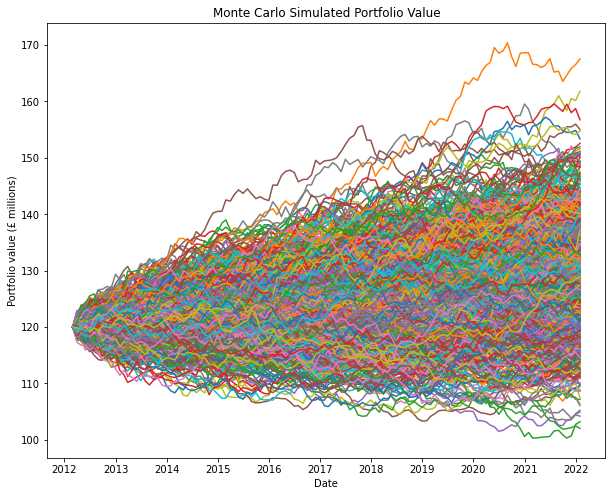

In [ ]:
plt.figure(figsize=(10,8))

start = time() #It will be useful later to calculate the time taken to run the simulation
S = [] #list to take the portfolio values on all paths on all time intervals

for i in range(I):
    price_path = [] #simulated path on time interval
    for t in range(len(payout_schedule)):
        if t == 0:
            price_path.append(S_0)
            S.append(S_0)
        else:
            z = gauss(0.0, 1.0)
            S_t = price_path[t-1]*exp((exp_ret-0.5*exp_vol**2)*dt+exp_vol*sqrt(dt)*z)
            price_path.append(S_t)
            S.append(S_t)
            price_path1 = []
            for i in price_path: 
                i = i/1000000
                price_path1.append(i)
    plt.plot(payout_schedule.index,price_path1)
    
    
plt.title('Monte Carlo Simulated Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio value (£ millions)')
total_time = time() - start
mean_port_value = round(np.mean(S),2)

print('Mean simulated portfolio value: ', mean_port_value, '\n')
print('Time taken for simulaion is %.5f seconds'% total_time)

In [ ]:
#Run a Monte Carlo Simulation of final payout

seed(1)

#Opening portfolio value
P_0 = payout_schedule.Final_Payout.iloc[0]

#Starting portfolio return
return_0 = 0

#Total time
T = 1

# Expected monthly return of the portfolio based on our sample 
exp_ret = np.mean(payout_schedule.Port_return)

#Expected volatility
exp_vol = np.std(payout_schedule.Port_return)

#Number of time steps per year
M = 12

#Time interval 
dt = T/M

#Number of simulationa
I = 1000 #updathe I to at least 1,000 simulations

Mean simulated payout value:  1039608.37 

Time taken for simulaion is 81.95089 seconds


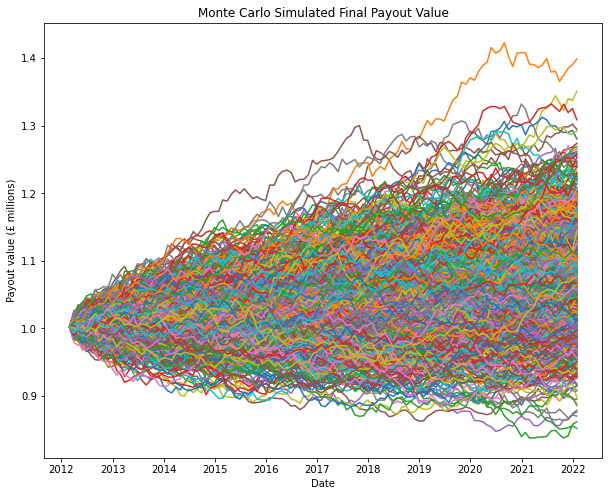

In [ ]:
plt.figure(figsize=(10,8))

start = time() #It will be useful later to calculate the time taken to run the simulation
P = [] #list to take the payout values on all paths on all time intervals

for i in range(I):
    payout_path = [] #simulated path on time interval
    for t in range(len(payout_schedule)):
        if t == 0:
            payout_path.append(P_0)
            P.append(P_0)
        else:
            z = gauss(0.0, 1.0)
            P_t = payout_path[t-1]*exp((exp_ret-0.5*exp_vol**2)*dt+exp_vol*sqrt(dt)*z)
            payout_path.append(P_t)
            P.append(P_t)
            payout_path1 = []
            for i in payout_path: 
                i = i/1000000
                payout_path1.append(i)
    plt.plot(payout_schedule.index,payout_path1)
    
    
plt.title('Monte Carlo Simulated Final Payout Value')
plt.xlabel('Date')
plt.ylabel('Payout value (£ millions)')
total_time = time() - start
mean_payout_value = round(np.mean(P),2)

print('Mean simulated payout value: ', mean_payout_value, '\n')
print('Time taken for simulaion is %.5f seconds'% total_time)

The mean of the simulated return:  0.000581694764460471
Total time taken is 30.30784 seconds


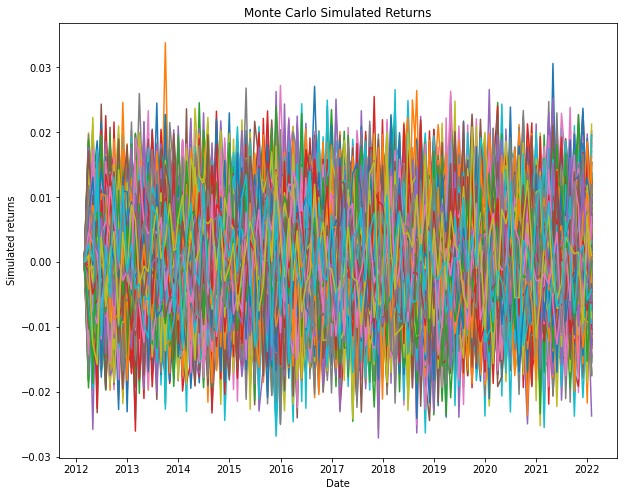

In [ ]:
#Run a Monte Carlo Simulation of monthly return

plt.figure(figsize = (10,8))
start = time()
Return = [] # a list to collect the returns on all path and all time intervals

return_I = [] # a list to collect the mean return of each path of all time interval
std_I = [] # a list to collect the standard deviation of return on each path

for i in range(I):
    return_path = [] #simulated path return on time interval
    
    for t in range(len(payout_schedule)):
        if t == 0:
            return_path.append(return_0)
            Return.append(return_0)
        else:
            e = gauss(0.0, 1.0)
            return_t = exp_ret*dt + exp_vol*e*sqrt(dt)
            return_path.append(return_t)
            Return.append(return_t)
    plt.plot(payout_schedule.index,return_path)

plt.title('Monte Carlo Simulated Returns')
plt.xlabel('Date')
plt.ylabel('Simulated returns')
total_time = time() - start
mean_port_ret = np.mean(Return)
print('The mean of the simulated return: ', mean_port_ret)
print('Total time taken is %.5f seconds'% total_time)

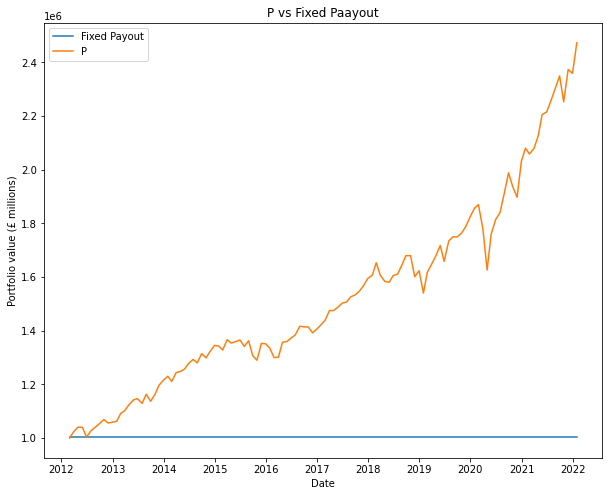

In [ ]:
#Plot the value of P against the expected minimum monthly payout
plt.figure(figsize=(10,8))
ax = plt.subplot()

ax.plot(payout_schedule.index, payout_schedule.Fixed_Payout, label = 'Fixed Payout')
ax.plot(payout_schedule.index, payout_schedule.P, label = 'P')

plt.title('P vs Fixed Paayout')
plt.xlabel('Date')
plt.ylabel('Portfolio value (£ millions)')
plt.legend()

plt.show()

In [ ]:
# Compute some metrics

#Portfolio standard deviation
port1_std = np.std(payout_schedule.Port_return)
print('Portfolio standard deviation', port1_std)

Portfolio standard deviation 0.0230819909629116


In [ ]:
# Compute the maximum drawdown

def drawdown(return_series: pd.Series):
    """Receives a time series of asset returns,
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = 100*(1 + return_series).cumprod()
    prev_peaks = wealth_index.cummax()
    pct_drawdown = (wealth_index - prev_peaks)/prev_peaks
    return pd.DataFrame({
        'Wealth':wealth_index,
        'Peaks':prev_peaks,
        'Drawdown':pct_drawdown
    })

The Max Drawdown of the 40/60 strategy is:  -12.49% 

The drawdown occured in:  2020-03-31 00:00:00 



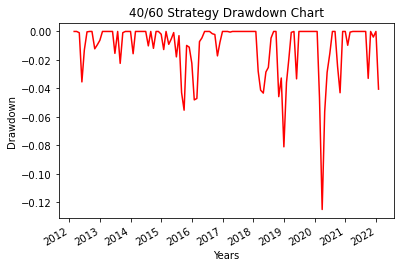

In [ ]:
#Max drawdown
MDD_40_60 = drawdown(payout_schedule.Port_return)['Drawdown'].min()

print('The Max Drawdown of the 40/60 strategy is: ', str(round((MDD_40_60*100),2))+'%','\n')

#Date of Max Drawdown
MDD_40_60_date = drawdown(payout_schedule.Port_return)['Drawdown'].idxmin()
print('The drawdown occured in: ',MDD_40_60_date , '\n')

#Plot the Max Drawdown
drawdown(payout_schedule.Port_return)['Drawdown'].plot(color = 'red')
plt.title('40/60 Strategy Drawdown Chart')
plt.xlabel('Years')
plt.ylabel('Drawdown')

plt.show()

In [ ]:
# Calculate the Recovery time

#Get the peak date
list_peak = drawdown(payout_schedule.Port_return)
peak = list_peak['Peaks'].loc[:str(MDD_40_60_date)].max()
date_peak = list_peak[list_peak['Peaks'] == peak].index.values.min()

# Get the recovery date
date_recovery = list_peak[list_peak['Peaks'] == peak].index.values.max()

recovery_time_1 = round((np.datetime64(date_recovery) - np.datetime64(date_peak))/np.timedelta64(365, 'D')*12.008,2)

print('The recovery time is: ', recovery_time_1,'months')

The recovery time is:  4.97 months


In [ ]:
# Compute the cumulative payout
cum_payout_40_60 = np.sum(payout_schedule.Final_Payout)

print('The cumulative final payout of 40/60 strategy is: ', cum_payout_40_60)

The cumulative final payout of 40/60 strategy is:  182442704.94893524


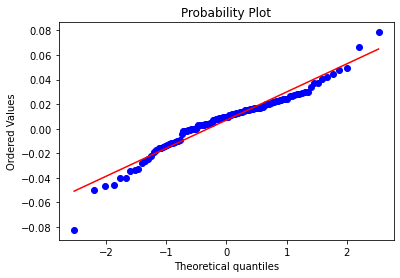

In [ ]:

from scipy import stats
stats.probplot(payout_schedule.Port_return, dist="norm", plot=plt)
plt.show()


In [ ]:
payout_schedule.Port_return.std()

0.023178771223699598

<Figure size 720x576 with 0 Axes>

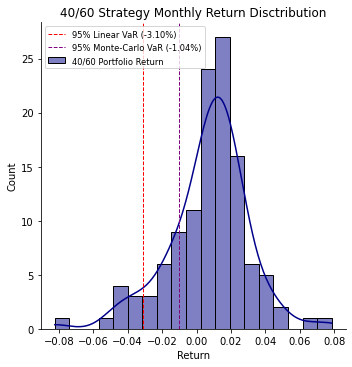

In [ ]:
# Expected monthly return 
port1_exp_ret = np.mean(payout_schedule.Port_return)

# Compute the 95-percentile Value at Risk over 1-month

#Normal Linear approach (.ppf is applicable on the assumption that the observations are normally distributed)
var_95_port1 = norm.ppf(1-0.95, port1_exp_ret, port1_std)

#Monte carlo Approach
a=0.05
monte_var_port1 =np.percentile(Return,a*100)


#Plot the monthly return distribution 
plt.figure(figsize=(10,8))


sns.displot(payout_schedule.Port_return, kde = True, color = 'darkblue', label = '40/60 Portfolio Return')
plt.axvline(var_95_port1, color='red', linestyle = '--', linewidth = 1, label = '95% Linear VaR ({0:.2f}%)'.format(var_95_port1* 100))
plt.axvline(monte_var_port1, color='purple', linestyle = '--', linewidth = 1, label = '95% Monte-Carlo VaR ({0:.2f}%)'.format(monte_var_port1* 100))
plt.title("40/60 Strategy Monthly Return Disctribution")
plt.xlabel('Return')
plt.legend(loc='upper left', fontsize='small')

plt.show()



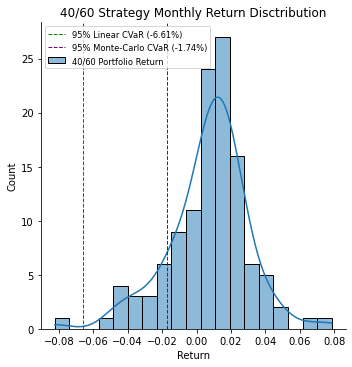

In [ ]:
#Conditional VaR

# Compute the 95-percentile Conditional Value at Risk over 1-month
def CVaR(returns, percentile):
    CVaR = 0.0
    sorted_returns = np.sort(returns)
    k = np.where(sorted_returns < np.percentile(sorted_returns, percentile))[0]
    for n in k:
        CVaR += sorted_returns[n]
    CVaR = CVaR / len(k)
    return CVaR

CVaR_95_port1 = CVaR(payout_schedule.Port_return, 0.95)

#Monte-carlo approach
monte_CVaR_port1 = CVaR(Return,0.95)


sns.displot(payout_schedule.Port_return, kde = True, label = '40/60 Portfolio Return')
plt.axvline(CVaR_95_port1, color='green', linestyle = '--', linewidth = 1, label = '95% Linear CVaR ({0:.2f}%)'.format(CVaR_95_port1* 100))
plt.axvline(monte_CVaR_port1, color='purple', linestyle = '--', linewidth = 1, label = '95% Monte-Carlo CVaR ({0:.2f}%)'.format(monte_CVaR_port1* 100))

plt.title("40/60 Strategy Monthly Return Disctribution")
plt.xlabel('Return')
plt.legend(loc='upper left', fontsize='small')

plt.show()

In [ ]:
from tabulate import tabulate
print(tabulate([['Linear VaR', '{0:.2f}%'.format(var_95_port1*100)], ['Linear CVaR', '{0:.2f}%'.format(CVaR_95_port1*100)], ['Monte_Carlo VaR', '{0:.2f}%'.format(monte_var_port1*100)], ['Monte_Carlo CVaR', '{0:.2f}%'.format(monte_CVaR_port1*100)]], headers = ['Type of VaR', 'Value at Risk']))

Type of VaR       Value at Risk
----------------  ---------------
Linear VaR        -3.10%
Linear CVaR       -6.61%
Monte_Carlo VaR   -1.04%
Monte_Carlo CVaR  -1.74%


# Second Strategy - Minimum Variance Approach

In [ ]:
#Standard deviation of Equity returns
eqty_std = np.std(returns_1.Equity)
print('Standard deviation of Equity returns: ',eqty_std, '\n')

#Standard deviation of Fixed Income returns
FI_std = np.std(returns_1.Fixed_Income)
print('Standard deviation of Fixed Income returns: ',FI_std , '\n')

#Correlation between both assets
rho = np.corrcoef([returns_1.Fixed_Income, returns_1.Equity])[1][0]
print('Correlation between return of the assets: ', rho)

Standard deviation of Equity returns:  0.03794054440627303 

Standard deviation of Fixed Income returns:  0.009077025301082113 

Correlation between return of the assets:  0.008353949726155227


In [ ]:
volatility = []

#set the independent variables
    
#w1 is weight of Fixed Income
w1 = symbols('w1')
#w2 is weight of Equity
w2 = symbols('w2')
alpha = symbols('alpha')

# set the Lagrange function
L = (w1**2)*(FI_std**2) + (w2**2)*(eqty_std**2) + 2*w1*w2*FI_std*eqty_std*rho - alpha*(w1+w2-1) 

# Set the differential functions
difyL_w1 = diff(L, w1)
difyL_w2 = diff(L, w2)
difyL_alpha = diff(L, alpha)   
    
result = solve([difyL_w1, difyL_w2, difyL_alpha], [w1, w2, alpha])

w1 = result.get(w1)
w2 = result.get(w2)
alpha = result.get(alpha)
    
port2_std = ((w1**2)*(FI_std**2) + (w2**2)*(eqty_std**2) + 2*w1*w2*FI_std*eqty_std*rho)**(0.5)
volatility = np.append(volatility,port2_std)
volatility

array([0.00884432487273570], dtype=object)

In [ ]:
# get the weights that'll give the minimum variance

port2_weight = pd.DataFrame(data=[result]).T
port2_weight = port2_weight[:2].set_axis(['Weight'],axis=1)

port2_weight

Weight
w1   0.947553478169431
w2  0.0524465218305694

In [ ]:
#Construct the portfolio schedule using the minimum variance weights

#obtain the schedule of portfolio return
min_var_port = pd.DataFrame()

port_return_2 = []

for i in range(len(returns_1)):
    port_return_2.append(port2_weight.iloc[0,0]*returns_1['Fixed_Income'].iloc[i] + port2_weight.iloc[1,0]*returns_1['Equity'].iloc[i])
    
min_var_port['Port_return'] = port_return_2

min_var_port = min_var_port.set_index(returns_1.index)

min_var_port = min_var_port.astype('float64')

min_var_port.head()

Port_return
2012-02-29     0.001958
2012-03-30    -0.003826
2012-04-30     0.008151
2012-05-31     0.006769
2012-06-29     0.001847

In [ ]:
# Fill up the payout schedule

payout_schedule2 = payout_schedule.copy()

payout_schedule2.Port_return = min_var_port.Port_return

for i in range(len(payout_schedule2)):
    payout_schedule2.Opening_Bal.iloc[1:] = payout_schedule2.Closing_Bal.iloc[0:119]
    payout_schedule2.Portfolio_Value.iloc[i] = payout_schedule2.Opening_Bal.iloc[i]*(1+payout_schedule2.Port_return.iloc[i])
    payout_schedule2.P.iloc[i] = 1/payout_schedule2.TTM.iloc[i] * payout_schedule2.Opening_Bal.iloc[i]
    payout_schedule2.Final_Payout.iloc[i] = payout_schedule2[['P', 'Fixed_Payout']].max(axis = 1).iloc[i]
    payout_schedule2.Closing_Bal.iloc[i] = payout_schedule2.Portfolio_Value.iloc[i] - payout_schedule2.Final_Payout.iloc[i]

/Users/user/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
payout_schedule2

TTM       Opening_Bal   Portfolio_Value               P  \
2012-02-29  120       120000000.0  120234967.047862       1000000.0   
2012-03-30  119  119232967.047862  118776741.476349  1001957.706285   
2012-04-30  118  117774741.476349  118734686.780287   998091.029461   
2012-05-31  117  117732686.780287  118529597.416616  1006262.280173   
2012-06-29  116  117523335.136442  117740414.930594  1013132.199452   
...         ...               ...               ...             ...   
2021-09-30    5    6998920.935077    6919921.227155  1399784.187015   
2021-10-29    4     5520137.04014    5539036.894706  1380034.260035   
2021-11-30    3    4159002.634671    4167836.378217  1386334.211557   
2021-12-31    2     2781502.16666     2778257.89101   1390751.08333   
2022-01-31    1     1387506.80768    1357033.561336   1387506.80768   

            Fixed_Payout    Final_Payout       Closing_Bal  Port_return  
2012-02-29     1002000.0       1002000.0  119232967.047862     0.001958  
2012-03-30     1002000.0       1002000.0  117774741.476349    -0.003826  
2012-04-30     1002000.0       1002000.0  117732686.780287     0.008151  
2012-05-31     1002000.0  1006262.280173  117523335.136442     0.006769  
2012-06-29     1002000.0  1013132.199452  116727282.731142     0.001847  
...                  ...             ...               ...          ...  
2021-09-30     1002000.0  1399784.187015     5520137.04014    -0.011287  
2021-10-29     1002000.0  1380034.260035    4159002.634671     0.003424  
2021-11-30     1002000.0  1386334.211557     2781502.16666     0.002124  
2021-12-31     1002000.0   1390751.08333     1387506.80768    -0.001166  
2022-01-31     1002000.0   1387506.80768     -30473.246344    -0.021963  

[120 rows x 8 columns]

In [ ]:
#Run a Monte Carlo Simulation of portfolio value

seed(1)

#Opening portfolio value
S_0 = payout_schedule2.Opening_Bal.iloc[0]

#Starting portfolio return
return_0 = 0

#Total time
T = 1

# Expected monthly return of the portfolio based on our sample 
exp_ret2 = np.mean(payout_schedule2.Port_return)

#Expected volatility
exp_vol2 = np.std(payout_schedule2.Port_return)

#Number of time steps per year
M = 12

#Time interval 
dt = T/M

#Number of simulations
I = 1000 #update the I to at least 1,000 simulations

Mean simulated portfolio value:  121594646.12 

Time taken for simulaion is 82.93757 seconds


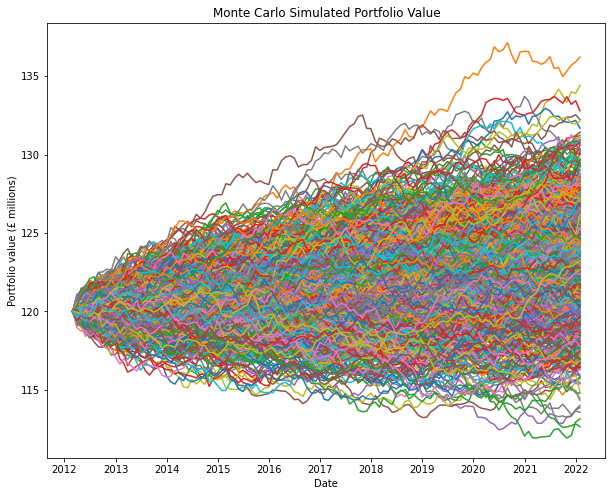

In [ ]:
plt.figure(figsize=(10,8))

start = time() #It will be useful later to calculate the time taken to run the simulation
S = [] #list to take the portfolio values on all paths on all time intervals

for i in range(I):
    price_path = [] #simulated path on time interval
    for t in range(len(payout_schedule2)):
        if t == 0:
            price_path.append(S_0)
            S.append(S_0)
        else:
            z = gauss(0.0, 1.0)
            S_t = price_path[t-1]*exp((exp_ret2-0.5*exp_vol2**2)*dt+exp_vol2*sqrt(dt)*z)
            price_path.append(S_t)
            S.append(S_t)
            price_path1 = []
            for i in price_path: 
                i = i/1000000
                price_path1.append(i)
    plt.plot(payout_schedule2.index,price_path1)
    
    
plt.title('Monte Carlo Simulated Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio value (£ millions)')
#plt.grid(axis = 'y', alpha = 0.5)
total_time = time() - start
mean_port_value = round(np.mean(S),2)

print('Mean simulated portfolio value: ', mean_port_value, '\n')
print('Time taken for simulaion is %.5f seconds'% total_time)

In [ ]:
#Run a Monte Carlo Simulation of final payout

seed(1)

#Opening portfolio value
P_0 = payout_schedule2.Final_Payout.iloc[0]

#Starting portfolio return
return_0 = 0

#Total time
T = 1

# Expected monthly return of the portfolio based on our sample 
exp_ret2 = np.mean(payout_schedule2.Port_return)

#Expected volatility
exp_vol2 = np.std(payout_schedule2.Port_return)

#Number of time steps per year
M = 12

#Time interval 
dt = T/M

#Number of simulationa
I = 1000 #updathe I to at least 1,000 simulations

Mean simulated payout value:  1015315.30 

Time taken for simulaion is 82.94475 seconds


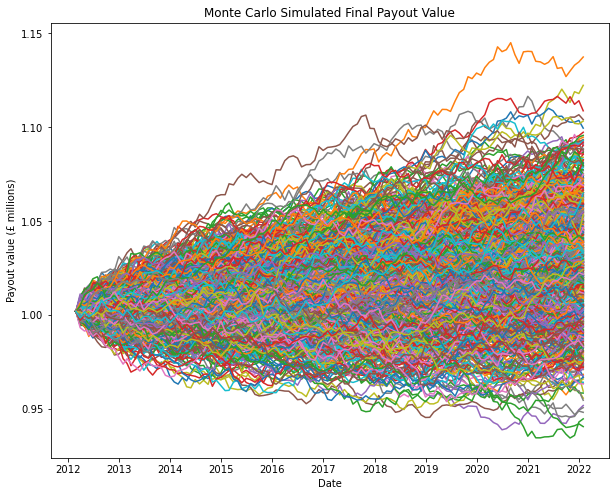

In [ ]:
plt.figure(figsize=(10,8))

start = time() #It will be useful later to calculate the time taken to run the simulation
P = [] #list to take the payout values on all paths on all time intervals

for i in range(I):
    payout_path = [] #simulated path on time interval
    for t in range(len(payout_schedule2)):
        if t == 0:
            payout_path.append(P_0)
            P.append(P_0)
        else:
            z = gauss(0.0, 1.0)
            P_t = payout_path[t-1]*exp((exp_ret2-0.5*exp_vol2**2)*dt+exp_vol2*sqrt(dt)*z)
            payout_path.append(P_t)
            P.append(P_t)
            payout_path1 = []
            for i in payout_path: 
                i = i/1000000
                payout_path1.append(i)
    plt.plot(payout_schedule2.index,payout_path1)
    
    
plt.title('Monte Carlo Simulated Final Payout Value')
plt.xlabel('Date')
plt.ylabel('Payout value (£ millions)')
total_time = time() - start
mean_payout_value = round(np.mean(P),2)

print('Mean simulated payout value: ', mean_payout_value, '\n')
print('Time taken for simulaion is %.5f seconds'% total_time)

The mean of the simulated return:  0.000208703293387054
Total time taken is 30.68771 seconds


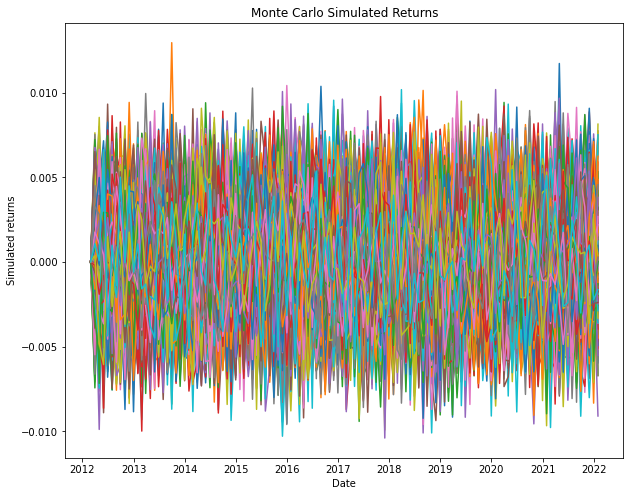

In [ ]:
#Run a Monte Carlo Simulation of monthly return

plt.figure(figsize = (10,8))
start = time()
Return2 = [] # a list to collect the returns on all path and all time intervals

return2_I = [] # a list to collect the mean return of each path of all time interval
std2_I = [] # a list to collect the standard deviation of return on each path

for i in range(I):
    return2_path = [] #simulated path return on time interval
    
    for t in range(len(payout_schedule2)):
        if t == 0:
            return2_path.append(return_0)
            Return2.append(return_0)
        else:
            e = gauss(0.0, 1.0)
            return2_t = exp_ret2*dt + exp_vol2*e*sqrt(dt)
            return2_path.append(return2_t)
            Return2.append(return2_t)
    plt.plot(payout_schedule2.index,return2_path)
    

plt.title('Monte Carlo Simulated Returns')
plt.xlabel('Date')
plt.ylabel('Simulated returns')
total_time = time() - start
mean_port2_ret = np.mean(Return2) 
print('The mean of the simulated return: ', mean_port2_ret)
print('Total time taken is %.5f seconds'% total_time)

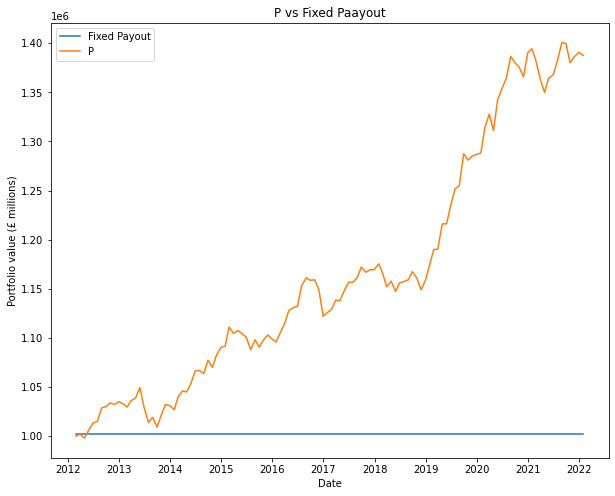

In [ ]:
#Plot the value of P against the expected minimum monthly payout
plt.figure(figsize=(10,8))
ax = plt.subplot()

ax.plot(payout_schedule2.index, payout_schedule2.Fixed_Payout, label = 'Fixed Payout')
ax.plot(payout_schedule2.index, payout_schedule2.P, label = 'P')

plt.title('P vs Fixed Paayout')
plt.xlabel('Date')
plt.ylabel('Portfolio value (£ millions)')
plt.legend()

plt.show()

The Max Drawdown of the Minimum Variance strategy is:  -3.79% 

The drawdown occured in:  2013-08-30 00:00:00 



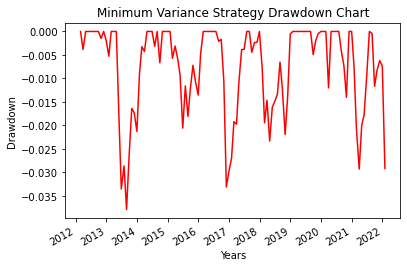

In [ ]:
#Max drawdown
MDD_min_var = drawdown(payout_schedule2.Port_return)['Drawdown'].min()

print('The Max Drawdown of the Minimum Variance strategy is: ', str(round((MDD_min_var*100),2))+'%','\n')

#Date of Max Drawdown
MDD_min_var_date = drawdown(payout_schedule2.Port_return)['Drawdown'].idxmin()
print('The drawdown occured in: ', MDD_min_var_date, '\n')

#Plot the Max Drawdown
drawdown(payout_schedule2.Port_return)['Drawdown'].plot(color = 'red')
plt.title('Minimum Variance Strategy Drawdown Chart')
plt.xlabel('Years')
plt.ylabel('Drawdown')

plt.show()

In [ ]:
# Calculate the Recovery time

#Get the peak date
list_peak2 = drawdown(payout_schedule2.Port_return)
peak2 = list_peak2['Peaks'].loc[:str(MDD_min_var_date)].max()
date_peak2 = list_peak2[list_peak2['Peaks'] == peak2].index.values.min()

# Get the recovery date
date_recovery2 = list_peak2[list_peak2['Peaks'] == peak2].index.values.max()

recovery_time_2 = round((np.datetime64(date_recovery2) - np.datetime64(date_peak2))/np.timedelta64(365, 'D')*12.008,2)

print('The recovery time is: ', recovery_time_2,'months')

The recovery time is:  11.02 months


In [ ]:
# Compute the cumulative payout
cum_payout_min_var = np.sum(payout_schedule2.Final_Payout)

print('The cumulative final payout of Minimum Variance strategy is: ', cum_payout_min_var)

The cumulative final payout of Minimum Variance strategy is:  139833459.3232164


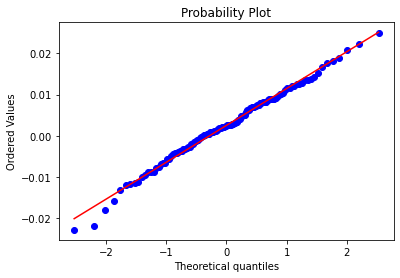

In [ ]:
stats.probplot(payout_schedule2.Port_return, dist="norm", plot=plt)
plt.show()

<Figure size 720x576 with 0 Axes>

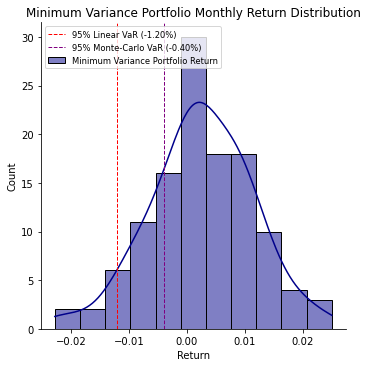

In [ ]:
#Linear Normal VaR

# Expected monthly return 
port2_exp_ret = np.mean(payout_schedule2.Port_return)

#Standard deviation
port2_std = np.std(payout_schedule2.Port_return)
# Compute the 95-percentile Value at Risk over 1-month

#Normal Linear approach (.ppf is applicable on the assumption that the observations are normally distributed)
var_95_port2 = norm.ppf(1-0.95, port2_exp_ret, port2_std)

#Monte carlo Approach
a=0.05
monte_var_port2 =np.percentile(Return2,a*100)


#Plot the monthly return distribution 
plt.figure(figsize=(10,8))

sns.displot(payout_schedule2.Port_return, kde = True, color = 'darkblue', label = 'Minimum Variance Portfolio Return')
plt.axvline(var_95_port2, color='red', linestyle = '--', linewidth = 1, label = '95% Linear VaR ({0:.2f}%)'.format(var_95_port2* 100))
plt.axvline(monte_var_port2, color='purple', linestyle = '--', linewidth = 1, label = '95% Monte-Carlo VaR ({0:.2f}%)'.format(monte_var_port2* 100))
plt.title("Minimum Variance Portfolio Monthly Return Distribution")
plt.xlabel('Return')
plt.legend(loc='upper left', fontsize='small')

plt.show()

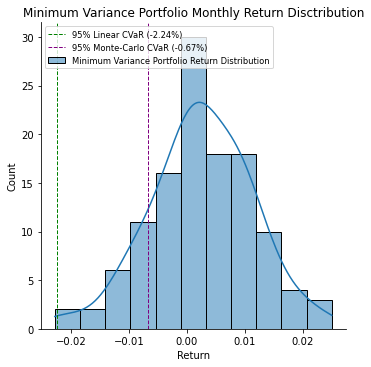

In [ ]:
#Conditional VaR

CVaR_95_port2 = CVaR(payout_schedule2.Port_return, 0.95)

#Monte-carlo approach
monte_CVaR_port2 = CVaR(Return2,0.95)

sns.displot(payout_schedule2.Port_return, kde = True, label = 'Minimum Variance Portfolio Return Distribution')
plt.axvline(CVaR_95_port2, color='green', linestyle = '--', linewidth = 1, label = '95% Linear CVaR ({0:.2f}%)'.format(CVaR_95_port2* 100))
plt.axvline(monte_CVaR_port2, color='purple', linestyle = '--', linewidth = 1, label = '95% Monte-Carlo CVaR ({0:.2f}%)'.format(monte_CVaR_port2* 100))

plt.title("Minimum Variance Portfolio Monthly Return Disctribution")
plt.xlabel('Return')
plt.legend(loc='upper left', fontsize='small')

plt.show()

In [ ]:
print(tabulate([['Linear VaR', '{0:.2f}%'.format(var_95_port2*100)], ['Linear CVaR', '{0:.2f}%'.format(CVaR_95_port2*100)], ['Monte_Carlo VaR', '{0:.2f}%'.format(monte_var_port2*100)], ['Monte_Carlo CVaR', '{0:.2f}%'.format(monte_CVaR_port2*100)]], headers = ['Type of VaR', 'Value at Risk']))

Type of VaR       Value at Risk
----------------  ---------------
Linear VaR        -1.20%
Linear CVaR       -2.24%
Monte_Carlo VaR   -0.40%
Monte_Carlo CVaR  -0.67%


# Third Strategy - Equal Risk Contribution (ERC) Approach

In [ ]:
# The main objective here is to obtain the respective assets weight that will split the risk contribution of each assets equally

#Equity standard deviation
eqty_std = np.std(returns_1.Equity)
print('Standard deviation of Equity returns: ',eqty_std, '\n')

#Fixed Income Standard Deviation
FI_std = np.std(returns_1.Fixed_Income)
print('Standard deviation of Fixed Income returns: ',FI_std, '\n')

#Correlation between both assets
rho = np.corrcoef([returns_1.Fixed_Income, returns_1.Equity])[1][0]
print('Correlation between return of the assets: ', rho)

Standard deviation of Equity returns:  0.03794054440627303 

Standard deviation of Fixed Income returns:  0.009077025301082113 

Correlation between return of the assets:  0.008353949726155227


In [ ]:
#Obtain the covariance of returns
returns_T = returns_1.T
returns_list = []

for i in range(len(returns_T.iloc[:,0])):
    returns_list.append(list(returns_T.iloc[i]))
    
returns_list = np.vstack(returns_list)
cov_returns = np.cov(returns_list)
cov_returns

array([[8.30847613e-05, 2.90117046e-06],
       [2.90117046e-06, 1.45158142e-03]])

In [ ]:
#Set the independent variables
import sympy as sy
w_FI = sy.symbols('w_FI')
w_eqty = sy.symbols('w_eqty')

#Calculate portfolio standard deviation
port3_std = ((w_FI**2)*(FI_std**2) + (w_eqty**2)*(eqty_std**2) + 2*w_FI*w_eqty*FI_std*eqty_std*rho)**0.5


#Calculate the risk contribution of each assets; rc_FI and rc_eqty
rc_FI = ((w_FI*cov_returns[0][0]+w_eqty*cov_returns[0][1])*w_FI)/port3_std
rc_eqty = ((w_FI*cov_returns[1][0]+w_eqty*cov_returns[1][1])*w_eqty)/port3_std

In [ ]:
#Obtain the weight that gives equal risk contribution

fun1 = rc_FI - rc_eqty
fun2 = (w_FI+w_eqty)-1

result = sy.solve([fun1,fun2],[w_FI,w_eqty])

print('The equal risk contribution weights for FI and Equity: ', result[0])

The equal risk contribution weights for FI and Equity:  (0.806943970996822, 0.193056029003178)


In [ ]:
#Confirm that the weights are correct - rc_FI will equal rc_eqty

result_w_FI = result[0][0]
result_w_eqty = result[0][1]

port3_std = ((result_w_FI**2)*(FI_std**2) + (result_w_eqty**2)*(eqty_std**2) + 2*result_w_FI*result_w_eqty*FI_std*eqty_std*rho)**0.5
result_rc_FI = ((result_w_FI*cov_returns[0][0]+result_w_eqty*cov_returns[0][1])*result_w_FI)/port3_std
result_rc_eqty = ((result_w_FI*cov_returns[1][0]+result_w_eqty*cov_returns[1][1])*result_w_eqty)/port3_std

print("The risk contribution of FI: ", result_rc_FI, '\n')
print("The risk contribution of equity: ", result_rc_eqty)

The risk contribution of FI:  0.00524460416901391 

The risk contribution of equity:  0.00524460416901390


In [ ]:
print('The weight of fixed income: ','{0:.2f}%'.format(result_w_FI*100),'\n', 'The weight of equities: ','{0:.2f}%'.format(result_w_eqty*100))

The weight of fixed income:  80.69% 
 The weight of equities:  19.31%


In [ ]:
#Construct the portfolio schedule using the ERC weights

#obtain the schedule of portfolio return
erc_port = pd.DataFrame()

port_return_3 = []

for i in range(len(returns_1)):
    port_return_3.append(result_w_FI*returns_1['Fixed_Income'].iloc[i] + result_w_eqty*returns_1['Equity'].iloc[i])
    
erc_port['Port_return'] = port_return_3

erc_port = erc_port.set_index(returns_1.index)

erc_port = erc_port.astype('float64')

erc_port.head()

Port_return
2012-02-29     0.007572
2012-03-30     0.001320
2012-04-30     0.005824
2012-05-31    -0.003836
2012-06-29     0.007330

In [ ]:
# Fill up the payout schedule

payout_schedule3 = payout_schedule.copy()

payout_schedule3.Port_return = erc_port.Port_return

for i in range(len(payout_schedule3)):
    payout_schedule3.Opening_Bal.iloc[1:] = payout_schedule3.Closing_Bal.iloc[0:119]
    payout_schedule3.Portfolio_Value.iloc[i] = payout_schedule3.Opening_Bal.iloc[i]*(1+payout_schedule3.Port_return.iloc[i])
    payout_schedule3.P.iloc[i] = 1/payout_schedule3.TTM.iloc[i] * payout_schedule3.Opening_Bal.iloc[i]
    payout_schedule3.Final_Payout.iloc[i] = payout_schedule3[['P', 'Fixed_Payout']].max(axis = 1).iloc[i]
    payout_schedule3.Closing_Bal.iloc[i] = payout_schedule3.Portfolio_Value.iloc[i] - payout_schedule3.Final_Payout.iloc[i]

/Users/user/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
payout_schedule3

TTM       Opening_Bal   Portfolio_Value               P  \
2012-02-29  120       120000000.0  120908595.144702       1000000.0   
2012-03-30  119  119906595.144702  120064822.331562  1007618.446594   
2012-04-30  118  119057203.884968  119750644.143641  1008959.354957   
2012-05-31  117  118741684.788683  118286133.910737  1014886.194775   
2012-06-29  116  117271247.715962  118130793.110261  1010959.032034   
...         ...               ...               ...             ...   
2021-09-30    5    8038623.659865    7903215.046514  1607724.731973   
2021-10-29    4    6295490.314541    6376305.338132  1573872.578635   
2021-11-30    3    4802432.759497    4805155.630026  1600810.919832   
2021-12-31    2    3204344.710194    3221460.271446  1602172.355097   
2022-01-31    1    1619287.916349    1576021.537904  1619287.916349   

            Fixed_Payout    Final_Payout       Closing_Bal  Port_return  
2012-02-29     1002000.0       1002000.0  119906595.144702     0.007572  
2012-03-30     1002000.0  1007618.446594  119057203.884968     0.001320  
2012-04-30     1002000.0  1008959.354957  118741684.788683     0.005824  
2012-05-31     1002000.0  1014886.194775  117271247.715962    -0.003836  
2012-06-29     1002000.0  1010959.032034  117119834.078227     0.007330  
...                  ...             ...               ...          ...  
2021-09-30     1002000.0  1607724.731973    6295490.314541    -0.016845  
2021-10-29     1002000.0  1573872.578635    4802432.759497     0.012837  
2021-11-30     1002000.0  1600810.919832    3204344.710194     0.000567  
2021-12-31     1002000.0  1602172.355097    1619287.916349     0.005341  
2022-01-31     1002000.0  1619287.916349     -43266.378445    -0.026719  

[120 rows x 8 columns]

In [ ]:
#Run a Monte Carlo Simulation of portfolio value

seed(1)

#Opening portfolio value
S_0 = payout_schedule3.Opening_Bal.iloc[0]

#Staring portfolio return
return_0 = 0

#Total time
T = 1

# Expected monthly return of the portfolio based on our sample (training set)
exp_ret3 = np.mean(payout_schedule3.Port_return)

#Expected volatility
exp_vol3 = np.std(payout_schedule3.Port_return)

#Number of time steps per year
M = 12

#Time interval 
dt = T/M

#Number of simulationa
I = 1000 #updathe I to at least 1,000 simulations

Mean simulated portfolio value:  122311955.73 

Time taken for simulaion is 83.25483 seconds


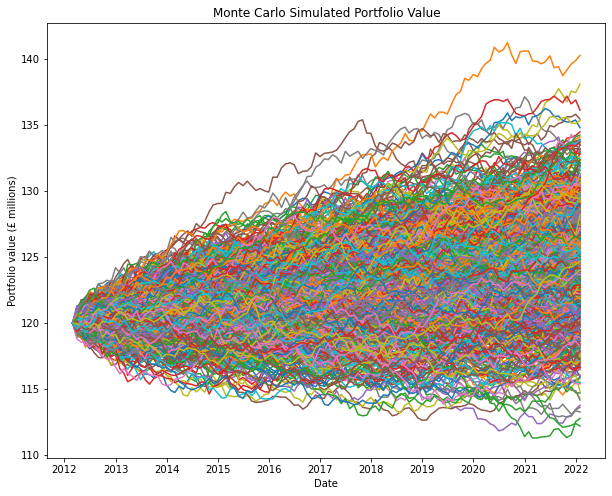

In [ ]:
plt.figure(figsize=(10,8))

start = time() #It will be useful later to calculate the time taken to run the simulation
S = [] #list to take the portfolio values on all paths on all time intervals

for i in range(I):
    price_path = [] #simulated path on time interval
    for t in range(len(payout_schedule3)):
        if t == 0:
            price_path.append(S_0)
            S.append(S_0)
        else:
            z = gauss(0.0, 1.0)
            S_t = price_path[t-1]*exp((exp_ret3-0.5*exp_vol3**2)*dt+exp_vol3*sqrt(dt)*z)
            price_path.append(S_t)
            S.append(S_t)
            price_path1 = []
            for i in price_path: 
                i = i/1000000
                price_path1.append(i)
    plt.plot(payout_schedule3.index,price_path1)
    
    
plt.title('Monte Carlo Simulated Portfolio Value')
plt.xlabel('Date')
plt.ylabel('Portfolio value (£ millions)')
total_time = time() - start
mean_port_value = round(np.mean(S),2)

print('Mean simulated portfolio value: ', mean_port_value, '\n')
print('Time taken for simulaion is %.5f seconds'% total_time)

In [ ]:
#Run a Monte Carlo Simulation of final payout

seed(1)

#Opening portfolio value
P_0 = payout_schedule3.Final_Payout.iloc[0]

#Starting portfolio return
return_0 = 0

#Total time
T = 1

# Expected monthly return of the portfolio based on our sample 
exp_ret3 = np.mean(payout_schedule3.Port_return)

#Expected volatility
exp_vol3 = np.std(payout_schedule3.Port_return)

#Number of time steps per year
M = 12

#Time interval 
dt = T/M

#Number of simulationa
I = 1000 #updathe I to at least 1,000 simulations

Mean simulated payout value:  1021304.83 

Time taken for simulaion is 84.77536 seconds


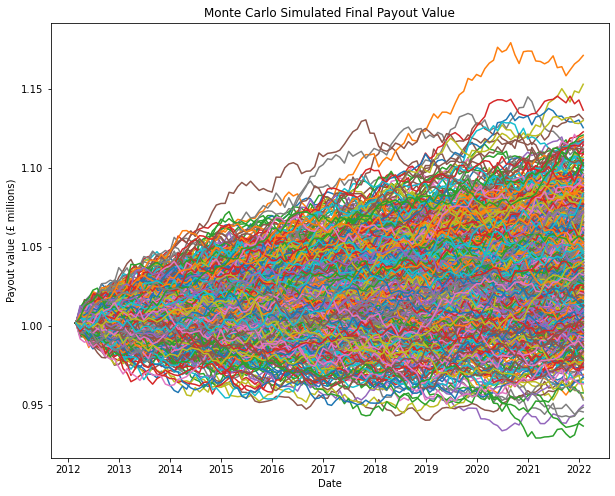

In [ ]:
plt.figure(figsize=(10,8))

start = time() #It will be useful later to calculate the time taken to run the simulation
P = [] #list to take the payout values on all paths on all time intervals

for i in range(I):
    payout_path = [] #simulated path on time interval
    for t in range(len(payout_schedule3)):
        if t == 0:
            payout_path.append(P_0)
            P.append(P_0)
        else:
            z = gauss(0.0, 1.0)
            P_t = payout_path[t-1]*exp((exp_ret3-0.5*exp_vol3**2)*dt+exp_vol3*sqrt(dt)*z)
            payout_path.append(P_t)
            P.append(P_t)
            payout_path1 = []
            for i in payout_path: 
                i = i/1000000
                payout_path1.append(i)
    plt.plot(payout_schedule3.index,payout_path1)
    
    
plt.title('Monte Carlo Simulated Final Payout Value')
plt.xlabel('Date')
plt.ylabel('Payout value (£ millions)')
total_time = time() - start
mean_payout_value = round(np.mean(P),2)

print('Mean simulated payout value: ', mean_payout_value, '\n')
print('Time taken for simulaion is %.5f seconds'% total_time)

The mean of the simulated return:  0.000304283804155082
Total time taken is 30.55088 seconds


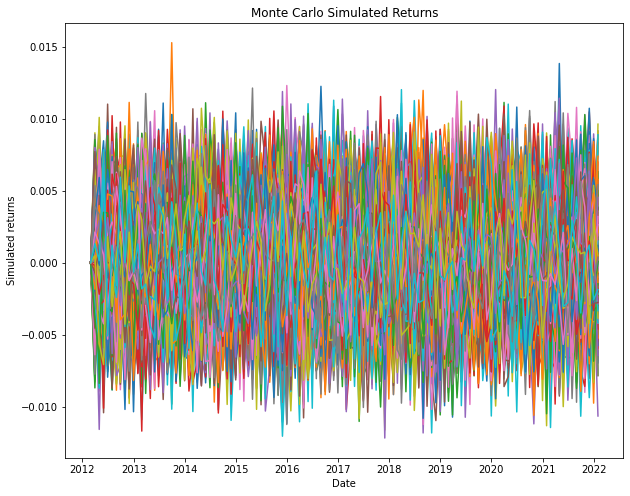

In [ ]:
#Run a Monte Carlo Simulation of monthly return

plt.figure(figsize = (10,8))
start = time()
Return3 = [] # a list to collect the returns on all path and all time intervals

return3_I = [] # a list to collect the mean return of each path of all time interval
std3_I = [] # a list to collect the standard deviation of return on each path

for i in range(I):
    return3_path = [] #simulated path return on time interval
    
    for t in range(len(payout_schedule3)):
        if t == 0:
            return3_path.append(return_0)
            Return3.append(return_0)
        else:
            e = gauss(0.0, 1.0)
            return3_t = exp_ret3*dt + exp_vol3*e*sqrt(dt)
            return3_path.append(return3_t)
            Return3.append(return3_t)
    plt.plot(payout_schedule3.index,return3_path)
    

plt.title('Monte Carlo Simulated Returns')
plt.xlabel('Date')
plt.ylabel('Simulated returns')
total_time = time() - start
mean_port3_ret = np.mean(Return3) 
print('The mean of the simulated return: ', mean_port3_ret)
print('Total time taken is %.5f seconds'% total_time)

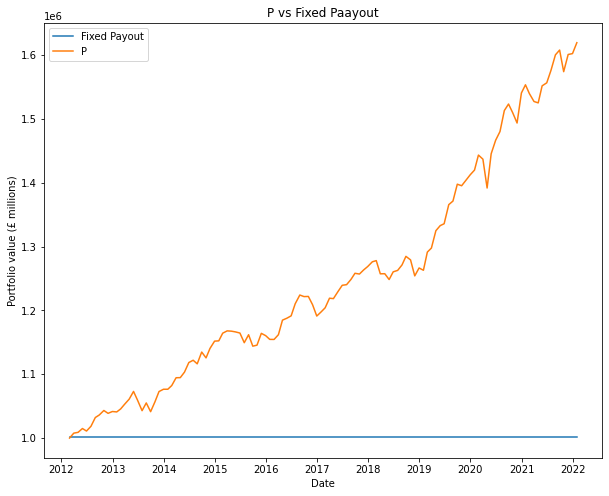

In [ ]:
#Plot the value of P against the expected minimum monthly payout
plt.figure(figsize=(10,8))
ax = plt.subplot()

ax.plot(payout_schedule3.index, payout_schedule3.Fixed_Payout, label = 'Fixed Payout')
ax.plot(payout_schedule3.index, payout_schedule3.P, label = 'P')

plt.title('P vs Fixed Paayout')
plt.xlabel('Date')
plt.ylabel('Portfolio value (£ millions)')
plt.legend()

plt.show()

The Max Drawdown of the ERC strategy is:  -3.42% 

The drawdown occured in:  2020-03-31 00:00:00 



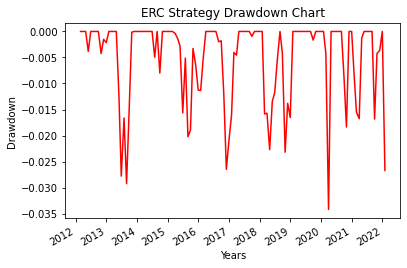

In [ ]:
#Max drawdown
MDD_erc = drawdown(payout_schedule3.Port_return)['Drawdown'].min()

print('The Max Drawdown of the ERC strategy is: ', str(round((MDD_erc*100),2))+'%','\n')

#Date of Max Drawdown
MDD_erc_date = drawdown(payout_schedule3.Port_return)['Drawdown'].idxmin()
print('The drawdown occured in: ', MDD_erc_date, '\n')


#Plot the Max Drawdown
drawdown(payout_schedule3.Port_return)['Drawdown'].plot(color = 'red')
plt.title('ERC Strategy Drawdown Chart')
plt.xlabel('Years')
plt.ylabel('Drawdown')

plt.show()

In [ ]:
# Calculate the Recovery time

#Get the peak date
list_peak3 = drawdown(payout_schedule3.Port_return)
peak3 = list_peak3['Peaks'].loc[:str(MDD_erc_date)].max()
date_peak3 = list_peak3[list_peak3['Peaks'] == peak3].index.values.min()

# Get the recovery date
date_recovery3 = list_peak3[list_peak3['Peaks'] == peak3].index.values.max()

recovery_time_3 = round((np.datetime64(date_recovery3) - np.datetime64(date_peak3))/np.timedelta64(365, 'D')*12.008,2)

print('The recovery time is: ', recovery_time_3,'months')

The recovery time is:  1.97 months


In [ ]:
# Compute the cumulative payout
cum_payout_erc = np.sum(payout_schedule3.Final_Payout)

print('The cumulative final payout of the ERC strategy is: ', cum_payout_erc)

The cumulative final payout of the ERC strategy is:  149835933.89552483


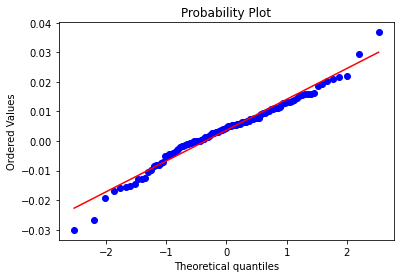

In [ ]:
stats.probplot(payout_schedule3.Port_return, dist="norm", plot=plt)
plt.show()

<Figure size 720x576 with 0 Axes>

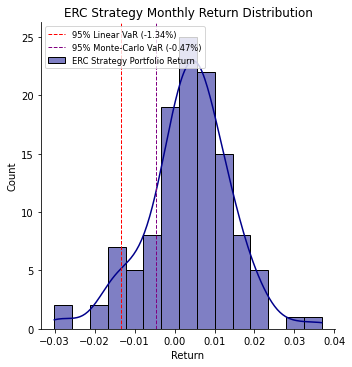

In [ ]:
# Expected monthly return 
port3_exp_ret = exp_ret3

#Standard deviation
port3_std = exp_vol3
# Compute the 95-percentile Value at Risk over 1-month

#Normal Linear approach (.ppf is applicable on the assumption that the observations are normally distributed)
var_95_port3 = norm.ppf(1-0.95, port3_exp_ret, port3_std)

#Monte carlo Approach
a=0.05
monte_var_port3 =np.percentile(Return3,a*100)


#Plot the monthly return distribution 
plt.figure(figsize=(10,8))

sns.displot(payout_schedule3.Port_return, kde = True, color = 'darkblue', label = 'ERC Strategy Portfolio Return')
plt.axvline(var_95_port3, color='red', linestyle = '--', linewidth = 1, label = '95% Linear VaR ({0:.2f}%)'.format(var_95_port3* 100))
plt.axvline(monte_var_port3, color='purple', linestyle = '--', linewidth = 1, label = '95% Monte-Carlo VaR ({0:.2f}%)'.format(monte_var_port3* 100))
plt.title("ERC Strategy Monthly Return Distribution")
plt.xlabel('Return')
plt.legend(loc='upper left', fontsize='small')

plt.show()

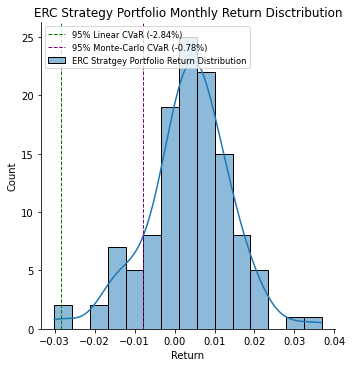

In [ ]:
#Conditional VaR
CVaR_95_port3 = CVaR(payout_schedule3.Port_return, 0.95)

#Monte-carlo approach
monte_CVaR_port3 = CVaR(Return3,0.95)

sns.displot(payout_schedule3.Port_return, kde = True, label = 'ERC Stratgey Portfolio Return Distribution')
plt.axvline(CVaR_95_port3, color='green', linestyle = '--', linewidth = 1, label = '95% Linear CVaR ({0:.2f}%)'.format(CVaR_95_port3* 100))
plt.axvline(monte_CVaR_port3, color='purple', linestyle = '--', linewidth = 1, label = '95% Monte-Carlo CVaR ({0:.2f}%)'.format(monte_CVaR_port3* 100))

plt.title("ERC Strategy Portfolio Monthly Return Disctribution")
plt.xlabel('Return')
plt.legend(loc='upper left', fontsize='small')

plt.show()

In [ ]:
print(tabulate([['Linear VaR', '{0:.2f}%'.format(var_95_port3*100)], ['Linear CVaR', '{0:.2f}%'.format(CVaR_95_port3*100)], ['Monte_Carlo VaR', '{0:.2f}%'.format(monte_var_port3*100)], ['Monte_Carlo CVaR', '{0:.2f}%'.format(monte_CVaR_port3*100)]], headers = ['Type of VaR', 'Value at Risk']))

Type of VaR       Value at Risk
----------------  ---------------
Linear VaR        -1.34%
Linear CVaR       -2.84%
Monte_Carlo VaR   -0.47%
Monte_Carlo CVaR  -0.78%


In [ ]:
port3_std

0.010401798268544237